In [ ]:
import geopandas as gpd # Geopandas to read Geographic data such as Shape and GeoJSON

import matplotlib.pyplot as plt
import json
import pandas as pd # Pandas to process tabular data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Reading in our data set

# Deprocated version of dataset
# df = pd.read_csv('/content/data_clean.csv')
# df = df.drop(columns=['Unnamed: 0'])
# df.head(5)

# Data separated by year
df_2016 = pd.read_csv('/content/2016_Data.csv')
df_2016 = df_2016.drop(columns=['Unnamed: 0'])

df_2017 = pd.read_csv('/content/2017_Data.csv')
df_2017 = df_2017.drop(columns=['Unnamed: 0'])

df_2018 = pd.read_csv('/content/2018_Data.csv')
df_2018 = df_2018.drop(columns=['Unnamed: 0'])

df_2019 = pd.read_csv('/content/2019_Data.csv')
df_2019 = df_2019.drop(columns=['Unnamed: 0'])

df_2020 = pd.read_csv('/content/2020_Data.csv')
df_2020 = df_2020.drop(columns=['Unnamed: 0'])

df_2021 = pd.read_csv('/content/2021_Data.csv')
df_2021 = df_2021.drop(columns=['Unnamed: 0'])

df_2022 = pd.read_csv('/content/2022_Data.csv')
df_2022 = df_2022.drop(columns=['Unnamed: 0'])

df_2023 = pd.read_csv('/content/2023_Data.csv')
df_2023 = df_2023.drop(columns=['Unnamed: 0'])

df_2016.head(5)

,Start_Time,City,County,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,State Codes
0,2016-02-08 05:46:00,Dayton,Montgomery,45424,False,False,False,False,False,False,False,False,False,False,False,False,False,39
1,2016-02-08 06:07:59,Reynoldsburg,Franklin,43068-3402,False,False,False,False,False,False,False,False,False,False,False,False,False,39
2,2016-02-08 06:49:27,Williamsburg,Clermont,45176,False,False,False,False,False,False,False,False,False,False,False,True,False,39
3,2016-02-08 07:23:34,Dayton,Montgomery,45417,False,False,False,False,False,False,False,False,False,False,False,False,False,39
4,2016-02-08 07:39:07,Dayton,Montgomery,45459,False,False,False,False,False,False,False,False,False,False,False,True,False,39


In [ ]:
# For testing data contents. Does not need to run everytime
df_2016['State Codes'].value_counts()

6     140452
48     49769
12     37060
42     21232
36     20097
17     17079
26     16652
13     13249
39     11331
53      9315
34      7953
24      7542
51      6493
37      6147
31      5811
25      5200
9       4210
29      3758
45      3015
4       2770
27      2567
19      2005
47      1688
18      1623
55      1562
44      1409
32      1357
8       1324
21      1068
41      1026
49       968
22       849
20       762
40       570
11       454
54       429
16       419
28       402
33       315
10       281
35       153
23       135
1        135
56        69
30        62
5         26
50        17
46         8
38         3
Name: State Codes, dtype: int64

In [ ]:
# Read the shapefile into a GeoDataFrame
us_counties_shapefile_path = "/content/tl_rd22_us_county.json"
gdf_us_counties = gpd.read_file(us_counties_shapefile_path)

# Reducing the geo data to the mainland US
gdf_mainland = gdf_us_counties[gdf_us_counties['STATEFP'] <= '56'].copy()
gdf_mainland = gdf_mainland[gdf_mainland['STATEFP'] != '02'].copy()
gdf_mainland = gdf_mainland[gdf_mainland['STATEFP'] != '15'].copy()

gdf_mainland['STATEFP'] = gdf_mainland['STATEFP'].astype(int)
# gdf_MA = gdf_us_counties[gdf_us_counties['STATEFP']=='25'].copy()


In [ ]:
# For testing data contents. Does not need to run everytime
gdf_mainland.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,,,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01936 42.09058, -97.01953 42.085..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.72832 46.26454, -123.71015 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,,,,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89338 34.08841, -104.87521 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91094 41.04612, -96.91079 41.028..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,,,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27357 40.35036, -98.27351 40.284..."


In [ ]:
# For testing data contents. Does not need to run everytime
gdf_mainland['STATEFP'].value_counts()

48    254
13    159
51    133
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
40     77
05     75
55     72
42     67
12     67
01     67
46     66
22     64
08     64
36     62
06     58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
24     24
56     23
34     21
32     17
23     16
04     15
50     14
25     14
33     10
09      8
44      5
10      3
11      1
Name: STATEFP, dtype: int64

Text(0.5, 1.0, 'Mainland US Counties')

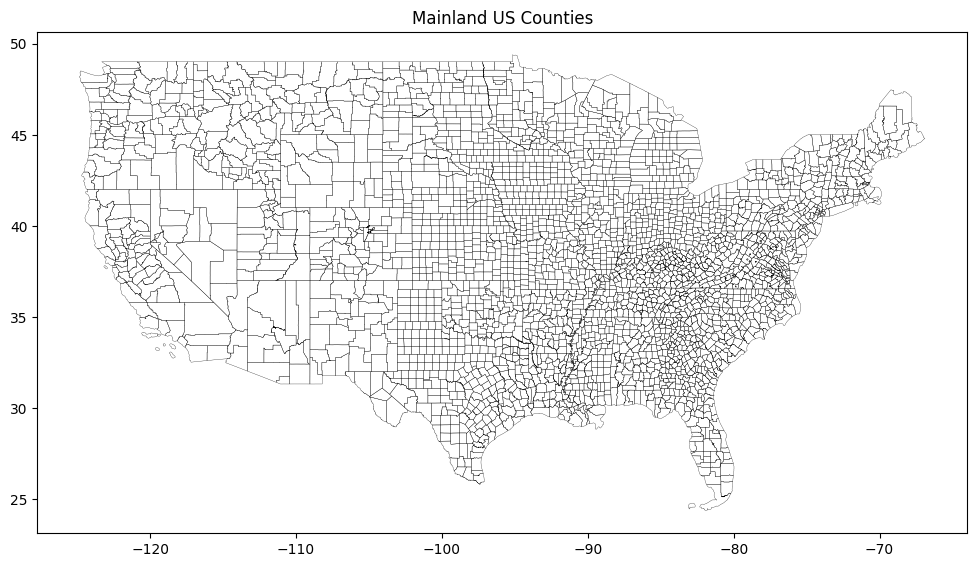

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
gdf_mainland.plot(ax=ax, color='none', linewidth=0.2)
ax.set_title("Mainland US Counties")

In [ ]:
# Creating a mapper to map the state abbreviation to its stateFP (for our car accident data)
# NO LONGER NEED TO RUN THIS AS IMPORTED DATA NOW HAS THIS MAPPING
state_mapper = {'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
                'CO': '08', 'CT': '09', 'DE': '10', 'DC': '11', 'FL': '12',
                'AL': '01', 'GA': '13', 'HI': '15', 'ID': '16', 'IL': '17',
                'IN': '18', 'IA': '19', 'KS': '20', 'KY': '21', 'LA': '22',
                'ME': '23', 'MD': '24', 'MA': '25', 'MI': '26', 'MN': '27',
                'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32',
                'NH': '33', 'NJ': '34', 'NM': '35', 'NY': '36', 'NC': '37',
                'ND': '38', 'OH': '39', 'OK': '40', 'OR': '41', 'PA': '42',
                'RI': '44', 'SC': '45', 'SD': '46', 'TN': '47','TX': '48',
                'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53', 'WV': '54',
                'WI': '55', 'WY': '56'}


In [ ]:
# Actually Mapping the states with the mapper
# THIS DOES NOT NEED TO RUN ANYMORE EITHER
df['State Codes'] = df['State'].replace(state_mapper)

In [ ]:
# Verifying the mapping
df['State Codes'].value_counts()

06    1741433
12     880192
48     582837
45     382557
36     347960
37     338199
51     303301
42     296620
27     192084
41     179660
04     170609
13     169234
17     168958
47     167388
26     162191
22     149701
34     140719
24     140417
39     118115
53     108221
01     101044
49      97079
08      90885
40      83647
29      77323
09      71005
18      67224
25      61996
55      34688
21      32254
31      28870
30      28496
19      26307
05      22780
32      21665
20      20992
11      18630
44      16971
28      15181
10      14097
54      13793
16      11376
35      10325
33      10213
56       3757
38       3487
23       2698
50        926
46        289
Name: State Codes, dtype: int64

In [ ]:
# Removing deprocated state column
# ALSO DOES NOT NEED TO RUN ANYMORE
df = df.drop(columns = ['State'])
df.head(5)

,Start_Time,City,County,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,State Codes
0,2016-02-08 05:46:00,Dayton,Montgomery,45424,False,False,False,False,False,False,False,False,False,False,False,False,False,39
1,2016-02-08 06:07:59,Reynoldsburg,Franklin,43068-3402,False,False,False,False,False,False,False,False,False,False,False,False,False,39
2,2016-02-08 06:49:27,Williamsburg,Clermont,45176,False,False,False,False,False,False,False,False,False,False,False,True,False,39
3,2016-02-08 07:23:34,Dayton,Montgomery,45417,False,False,False,False,False,False,False,False,False,False,False,False,False,39
4,2016-02-08 07:39:07,Dayton,Montgomery,45459,False,False,False,False,False,False,False,False,False,False,False,True,False,39


In [ ]:
# Splitting data by year into separate dataframes
# DON'T NEED TO RUN
df_2016 = df[df['Start_Time'].str.contains('2016')].copy()
df_2017 = df[df['Start_Time'].str.contains('2017')].copy()
df_2018 = df[df['Start_Time'].str.contains('2018')].copy()
df_2019 = df[df['Start_Time'].str.contains('2019')].copy()
df_2020 = df[df['Start_Time'].str.contains('2020')].copy()
df_2021 = df[df['Start_Time'].str.contains('2021')].copy()
df_2022 = df[df['Start_Time'].str.contains('2022')].copy()
df_2023 = df[df['Start_Time'].str.contains('2023')].copy()

In [ ]:
# Exporting the various years as their own csv
df_2016.to_csv('2016_Data.csv')
df_2017.to_csv('2017_Data.csv')
df_2018.to_csv('2018_Data.csv')
df_2019.to_csv('2019_Data.csv')
df_2020.to_csv('2020_Data.csv')
df_2021.to_csv('2021_Data.csv')
df_2022.to_csv('2022_Data.csv')
df_2023.to_csv('2023_Data.csv')

In [ ]:
# Creating a dataframe for each year that aggregates all the state data to a single entry
# Each entry will contain the # of accidents, the # of occurances for each factor, and the state FP for a state

# A list of various traffic scenes to be accessed dynamically via loop
traffic_scene_list = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# A list of columns for the new dataframe. Will be reused for each year's version of the dataframe
columns = ['State Codes', 'Total Accidents', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
df_2016_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2016['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2016[df_2016['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2016_state_data.loc[len(df_2016_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 2].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 3].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 7].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 14].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 43].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 52].copy()
df_2016_state_data = df_2016_state_data[df_2016_state_data['State Codes'] != 15].copy()
df_2016_state_data


,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,135,2,0,1,0,42,0,0,0,0,0,0,10,0
3,4,2770,37,1,245,9,473,4,12,0,20,81,1,275,0
4,5,26,0,0,1,0,5,0,0,0,0,0,0,1,0
5,6,140452,977,51,7774,193,19137,90,1678,4,4121,3831,85,13313,0
7,8,1324,9,0,164,8,235,5,3,0,10,20,0,161,0
8,9,4210,24,0,220,10,591,3,6,0,4,53,0,241,0
9,10,281,0,0,15,1,26,0,1,0,1,4,0,44,0
10,11,454,31,0,98,1,52,2,6,0,25,12,0,127,0
11,12,37060,164,4,9434,93,2171,69,129,1,1307,288,55,11879,0
12,13,13249,87,0,1209,50,887,0,70,0,58,88,29,2060,0


In [ ]:
df_2017_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2017['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2017[df_2017['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2017_state_data.loc[len(df_2017_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 2].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 3].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 7].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 14].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 43].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 52].copy()
df_2017_state_data = df_2017_state_data[df_2017_state_data['State Codes'] != 15].copy()
df_2017_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,2904,7,0,70,29,258,0,6,0,16,13,0,439,0
3,4,12329,270,18,4170,134,681,116,178,0,273,1178,19,3988,0
4,5,134,0,0,1,0,17,0,1,0,0,0,0,1,0
5,6,152748,912,38,7399,189,21674,118,1675,8,3808,3878,56,13092,0
7,8,7105,161,3,1941,68,426,66,49,0,204,254,4,2017,0
8,9,6742,36,0,334,26,872,10,8,0,9,121,0,394,0
9,10,891,7,3,107,4,26,3,1,0,0,30,3,218,0
10,11,763,48,0,146,0,128,1,19,0,36,19,0,188,0
11,12,60706,267,6,13267,93,4228,135,162,2,2103,560,60,16897,0
12,13,22071,183,0,1805,66,1729,7,127,0,93,149,33,3092,0


In [ ]:
df_2018_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2018['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2018[df_2018['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2018_state_data.loc[len(df_2018_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 2].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 3].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 7].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 14].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 43].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 52].copy()
df_2018_state_data = df_2018_state_data[df_2018_state_data['State Codes'] != 15].copy()
df_2018_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,14100,42,0,369,296,547,4,36,0,108,91,0,3071,0
3,4,22706,489,46,8857,249,766,277,291,0,591,2417,49,8468,0
4,5,598,4,0,14,1,75,0,7,0,0,2,0,13,0
5,6,156898,985,42,7614,222,21763,136,1835,3,3937,4531,75,13839,0
7,8,14149,285,2,3462,143,751,149,94,0,359,534,7,3609,0
8,9,6421,61,0,422,29,779,12,12,0,9,98,0,450,0
9,10,1644,23,1,226,11,61,3,9,0,2,64,3,454,0
10,11,955,94,0,212,5,147,0,10,0,49,14,0,252,0
11,12,65781,308,4,12982,99,4313,113,239,9,1882,518,63,17581,0
12,13,24632,186,0,2100,54,2201,13,164,0,90,171,44,3538,0


In [ ]:
df_2019_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2019['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2019[df_2019['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2019_state_data.loc[len(df_2019_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 2].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 3].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 7].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 14].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 43].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 52].copy()
df_2019_state_data = df_2019_state_data[df_2019_state_data['State Codes'] != 15].copy()
df_2019_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,19238,67,0,531,488,490,2,40,0,137,262,0,4776,0
3,4,24529,432,43,10839,194,553,392,388,0,518,2954,45,10121,0
4,5,991,3,0,12,0,174,0,5,0,0,3,0,23,0
5,6,213455,1182,91,11065,286,27861,184,2444,5,5289,6013,149,19711,0
7,8,17620,292,31,3550,118,899,177,120,0,351,583,33,3599,0
8,9,5457,36,0,252,5,472,2,7,0,6,119,0,247,0
9,10,1620,30,0,247,6,16,5,3,0,2,59,0,528,0
10,11,1487,196,2,466,4,139,3,41,0,102,76,3,542,0
11,12,60313,221,6,12380,170,3532,177,295,10,1768,578,67,16082,0
12,13,23718,114,0,1723,82,2005,12,212,0,66,159,27,2771,0


In [ ]:
df_2020_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2020['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2020[df_2020['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2020_state_data.loc[len(df_2020_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 2].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 3].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 7].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 14].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 43].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 52].copy()
df_2020_state_data = df_2020_state_data[df_2020_state_data['State Codes'] != 15].copy()
df_2020_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,20185,81,0,427,421,894,3,64,0,119,306,2,4144,0
3,4,29535,523,92,14481,366,691,436,471,2,907,2964,96,13888,0
4,5,3090,9,0,296,3,313,3,14,0,2,3,0,140,0
5,6,285532,1600,178,15413,407,34599,285,3160,5,6226,9361,249,24433,0
7,8,13889,201,38,3110,110,866,134,95,1,204,401,40,3401,0
8,9,9341,45,0,270,25,1308,9,12,0,3,123,0,284,0
9,10,2478,32,0,328,8,104,17,29,0,7,73,0,633,0
10,11,2632,250,1,608,2,428,1,55,0,120,75,1,839,0
11,12,130362,1026,39,28912,284,7837,369,708,10,7107,2132,192,28777,0
12,13,23427,45,0,1077,85,2329,12,128,0,18,125,0,2181,0


In [ ]:
df_2021_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2021['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2021[df_2021['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2021_state_data.loc[len(df_2021_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 2].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 3].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 7].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 14].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 43].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 52].copy()
df_2021_state_data = df_2021_state_data[df_2021_state_data['State Codes'] != 15].copy()
df_2021_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,23510,56,0,370,365,1226,5,65,0,87,234,3,3793,0
3,4,33075,588,212,8847,278,1072,335,318,1,1081,3912,218,6409,0
4,5,7384,15,0,534,4,550,8,45,0,4,17,0,218,0
5,6,341876,3199,266,19544,433,26729,504,3143,15,7714,12537,378,22630,0
7,8,11576,91,37,1091,69,633,81,72,0,101,358,41,1141,0
8,9,16172,56,0,318,32,1965,15,40,0,7,157,0,333,0
9,10,3941,26,3,327,14,167,7,30,0,4,101,3,656,0
10,11,4685,472,3,1061,12,636,18,90,0,193,155,5,1056,0
11,12,240608,2688,85,53685,329,7262,1002,1297,16,19798,5229,398,32092,0
12,13,20551,20,0,665,39,1421,4,117,0,9,139,2,1358,0


In [ ]:
df_2022_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2022['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2022[df_2022['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2022_state_data.loc[len(df_2022_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 2].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 3].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 7].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 14].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 43].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 52].copy()
df_2022_state_data = df_2022_state_data[df_2022_state_data['State Codes'] != 15].copy()
df_2022_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,20054,50,0,229,249,1068,1,51,0,69,195,5,2632,0
3,4,39423,552,287,8126,224,1606,349,266,1,1101,4469,297,5008,0
4,5,9432,13,0,105,9,816,4,39,0,0,33,0,109,0
5,6,375913,3573,303,20281,400,28005,466,3342,18,8609,13237,425,23134,0
7,8,20930,59,8,1047,65,1465,56,119,0,108,471,10,1146,0
8,9,20171,70,0,448,51,2162,17,59,0,17,147,0,427,0
9,10,3088,13,1,221,15,124,5,16,0,5,61,1,438,0
10,11,6959,824,2,1676,41,730,33,190,2,359,205,6,1653,0
11,12,263119,3137,152,55399,268,8423,1051,1197,16,21579,5655,425,29700,0
12,13,33129,23,0,911,94,3012,15,151,0,12,220,0,1592,0


In [ ]:
df_2023_state_data = pd.DataFrame(columns=columns)

# A nested for loop to aggregate the data. The outer loop will iterate through each state
for stateIndex in range(1, 57):
  # Creating a temporary list that will store the data for a state before being appended to the df
  temp_list = []
  temp_list.append(stateIndex)

  # Will try to append the # of accidents to the list if there is data for that state
  # If there is no data, a 0 is appended
  try:
    temp_list.append(df_2023['State Codes'].value_counts()[stateIndex])
  except:
    temp_list.append(0)

  # The inner loop will get the # of appearances for each traffic scene
  for sceneIndex in traffic_scene_list:
    # If there is data for that traffic scene in that state, append it to the list
    # Otherwise, append a 0
    try:
      temp_list.append(df_2023[df_2023['State Codes'] == stateIndex][sceneIndex].value_counts()[1])
    except:
      temp_list.append(0)

  # Append the list to the df as a row before the list is reset
  df_2023_state_data.loc[len(df_2023_state_data.index)] = temp_list

# Removing codes that are not mainland US or do not exist in general
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 2].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 3].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 7].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 14].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 43].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 52].copy()
df_2023_state_data = df_2023_state_data[df_2023_state_data['State Codes'] != 15].copy()
df_2023_state_data

,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,1,918,0,0,10,6,62,0,4,0,8,4,0,58,0
3,4,6242,44,25,786,37,329,31,21,0,82,315,25,664,0
4,5,1125,6,0,9,2,71,0,4,0,0,4,0,9,0
5,6,74559,600,57,3366,68,5886,89,601,1,1352,2203,78,4249,0
7,8,4292,2,0,133,20,306,5,39,0,21,65,1,151,0
8,9,2491,4,0,41,10,323,3,6,0,0,26,0,59,0
9,10,154,0,0,9,1,7,0,2,0,0,2,0,18,0
10,11,695,61,0,133,2,76,6,10,0,31,9,0,142,0
11,12,22243,168,11,4765,47,1046,56,122,6,1166,444,41,4132,0
12,13,8457,3,0,161,15,772,4,41,0,8,94,0,275,0


In [ ]:
# Merging our data with the geo data.
gdf_merged_2016_state = gdf_mainland.merge(df_2016_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2017_state = gdf_mainland.merge(df_2017_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2018_state = gdf_mainland.merge(df_2018_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2019_state = gdf_mainland.merge(df_2019_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2020_state = gdf_mainland.merge(df_2020_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2021_state = gdf_mainland.merge(df_2021_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2022_state = gdf_mainland.merge(df_2022_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2023_state = gdf_mainland.merge(df_2023_state_data, left_on='STATEFP', right_on='State Codes', how='inner').copy()
gdf_merged_2023_state.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State Codes,Total Accidents,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,,,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01936 42.09058, -97.01953 42.085...",31,89,0,0,0,0,4,1,0,0,0,1,0,2,0
1,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91094 41.04612, -96.91079 41.028...",31,89,0,0,0,0,4,1,0,0,0,1,0,2,0
2,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,,,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27357 40.35036, -98.27351 40.284...",31,89,0,0,0,0,4,1,0,0,0,1,0,2,0
3,31,101,00835872,31101,Keith,Keith County,06,H1,G4020,,,,A,2749903240,124629167,+41.1942448,-101.6444493,"POLYGON ((-102.05176 41.00387, -102.03317 41.0...",31,89,0,0,0,0,4,1,0,0,0,1,0,2,0
4,31,137,00835890,31137,Phelps,Phelps County,06,H1,G4020,,,,A,1398048636,1646526,+40.5163647,-099.4065568,"POLYGON ((-99.64346 40.68491, -99.64322 40.672...",31,89,0,0,0,0,4,1,0,0,0,1,0,2,0


Text(0.5, 1.0, 'Accidents by state for 2017')

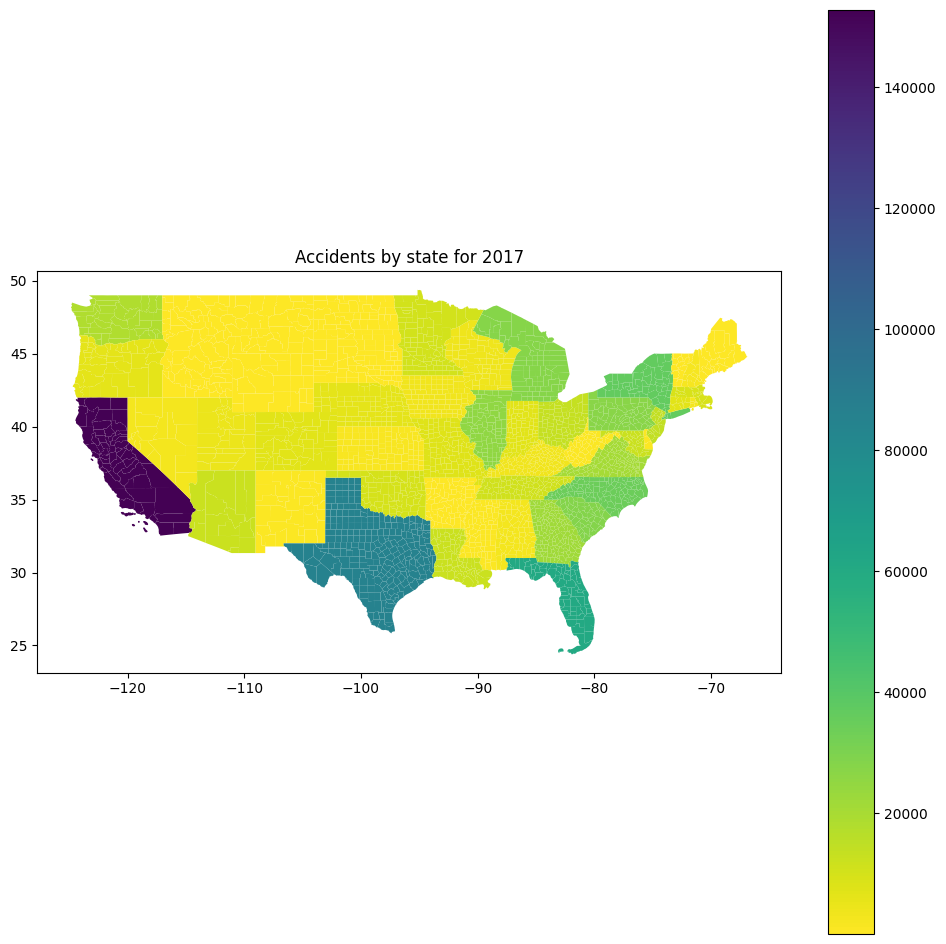

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
gdf_merged_2017_state.plot(column='Total Accidents', ax=ax, linewidth=0.2,legend=True,cmap='viridis_r')
ax.set_title(f'Accidents by state for 2017')

In [ ]:
# Exporting the data as a geoJSON
gdf_merged_2016_state.to_file("2016_state_data.geojson", driver='GeoJSON')

In [ ]:
gdf_merged_2017_state.to_file("2017_state_data.geojson", driver='GeoJSON')
gdf_merged_2018_state.to_file("2018_state_data.geojson", driver='GeoJSON')
gdf_merged_2019_state.to_file("2019_state_data.geojson", driver='GeoJSON')
gdf_merged_2020_state.to_file("2020_state_data.geojson", driver='GeoJSON')
gdf_merged_2021_state.to_file("2021_state_data.geojson", driver='GeoJSON')
gdf_merged_2022_state.to_file("2022_state_data.geojson", driver='GeoJSON')
gdf_merged_2023_state.to_file("2023_state_data.geojson", driver='GeoJSON')